# Machine Learning Final Project: Wildfire Prediction Model
 
#### By Shane Duncan


## Introduction

 Natural disasters are a serious problem that have devastating consequences on a region’s infrastructure and people. Scientists have been using machine learning to examine various conditions and behaviors on the earth’s surface to signal the potential onset of a natural disaster, such as an earthquake or a hurricane. In the past few months and years we have seen a rise in wildfires in America, especially on the west coast. This natural phenomenon not only destructs acres of forest and vegetation every year, but it also affects many other aspects of life. For instance, the health of the residents. The inhalation of wildfire smoke can embed itself deep into an individual’s lungs, causing an array of potential respiratory issues such as bronchitis or asthma. Wildfires also bear the threat of carbon monoxide being released into the air we breathe and its adverse effects (“How Wildfires Affect Our Health”). There are also economic consequences to wildfires, when a region’s vegetation and agriculture is impacted, the location’s economic infrastructure can be tarnished. 

## Problem

Wildfires are more difficult to monitor than other natural disasters, as we cannot simply receive a satellite image for a slight shift in the earth’s tectonic plates as we would when monitoring and predicting a potential earthquake. The occurrence of wildfires have a much more nonlinear nature, as the causes are often obscure and hard to predict (Adams). The improvement of predicting and monitoring the spread of a wildfire requires a greater comprehension of what causes these fires, and how they behave then spread. The use of artificial intelligence technologies such as machine learning will allow wildfires to be monitored more conclusively. Researchers can use data mining and machine learning algorithms to create predictive models that can effectively monitor and detect wildfires despite their ambiguous nature.

## Supervised Learning

Machine learning is split into two categories in terms of how a model “learns” from data to make predictions, these categories are called supervised and unsupervised learning. We will be focusing mainly on supervised learning algorithms as the data we are using to train our model is correctly labeled. Within supervised learning, classification and regression methods are used to build predictive models. The data we are using categorizes the response variable as “fire” or “no fire”, therefore we will be taking the classification problem approach. 

The data will be modeled using supervised learning algorithms such as Logistic Regression, SVMs, and Neural Networks to examine which model can most accurately predict whether or not a wildfire will occur based on a set of parameters. The dataset used contains data from *NASA’s Land Processes Distributed Active Archive Center*, which is gathered and interpreted by remote sensing and satellite imaging on the earth’s surface. The attributes used are: Normalized Difference Vegetation Index (NDVI),  Land Surface Temperature (LST), and Burned Area.These parameters measure the state of the crops in the region, the temperature of the soil, and the size of the burned area respectively. 


## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import RobustScaler, StandardScaler, PolynomialFeatures, Normalizer
from sklearn.metrics import f1_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib import pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
%matplotlib inline

## Preprocessing

In [2]:
url = "https://raw.githubusercontent.com/ouladsayadyounes/WildFires/master/WildFires_DataSet.csv"
df = pd.read_csv(url)
df.head()

,NDVI,LST,BURNED_AREA,CLASS
0,0.506782,14584.272727,4.692308,no_fire
1,0.522150,14655.833333,5.000000,no_fire
2,0.682284,14780.000000,5.000000,fire
3,0.120046,13298.500000,3.500000,no_fire
4,0.568734,14743.000000,5.000000,no_fire


In [3]:
# Converting class from 0 to 1
df["CLASS"] = df["CLASS"].map({"fire":1, "no_fire":0})

#### Graphing the relationship between two of the features (LST vs NDVI)

<AxesSubplot:xlabel='NDVI', ylabel='LST'>

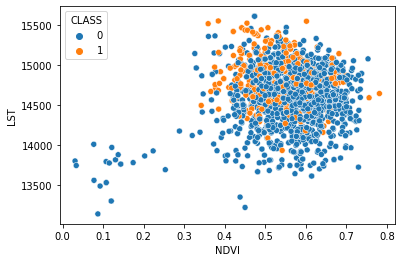

In [4]:
sns.scatterplot(x="NDVI", y="LST", hue="CLASS", data=df)

In [5]:
# We can see how much of each class we have in the dataset
print("0:", df[df["CLASS"] == 0]["CLASS"].count())
print("1:", df[df["CLASS"] == 1]["CLASS"].count())

0: 1327
1: 386


### Manually Balancing the Dataset

In [367]:
# There's a significantly greater amount of 0 than 1
# This is how we manually balanced the dataset

"""
df_class0 = df[df["CLASS"] == 0]
df_class1 = df[df["CLASS"] == 1]

from sklearn.utils import shuffle
df_class0 = shuffle(df_class0)

df_class0 = df_class0[:400]

df = pd.concat([df_class0, df_class1])
print("new shape", df.shape)

df = shuffle(df)
df.head()
"""

'\ndf_class0 = df[df["CLASS"] == 0]\ndf_class1 = df[df["CLASS"] == 1]\n\nfrom sklearn.utils import shuffle\ndf_class0 = shuffle(df_class0)\n\ndf_class0 = df_class0[:400]\n\ndf = pd.concat([df_class0, df_class1])\nprint("new shape", df.shape)\n\ndf = shuffle(df)\ndf.head()\n'

In [22]:
# turn out pandas array into numpy array
df_np = df.to_numpy()

# create out X and y arrays
X = df_np[:, :3]
y = df_np[:, 3]


scaler = RobustScaler()
X = scaler.fit_transform(X)

# create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=10)

## Analysis of Preprocessing

The first step in our data preprocessing was to convert our class response variables from *fire* and *no_fire* to 0 and 1 to encode our class.

We noticed there was quite a significant imbalance between the number of fire and no_fire classifications. There were 1327 no_fire instances but only 386 fire.

Above we show the manual approach we took for balancing the dataset by reducing the number of no_fire instances. We also tried using the sklearn *class_weight* parameter in each of our learning methods, where *class_weight="balanced"*. This approach automatically adjusts the weights according to the imbalance of the classes. The automatic dataset balancing method was more successful in terms of prediction accuracy and precision.

Lastly in our data preprocessing, we used sklearn's RobustScaler() method to reduce the number of outliers that we noticed in our dataset while scaling our features.


## Logistic regression

In [23]:
regs = ["identity", "lasso", "ridge", "poly"]
log_pred = [None]*len(regs)
log_train = [None]*len(regs)
max_iters = [10, 100, 1000, 10000, 100000]
log_table = []

### Simple Logistic Regression with no Extra Parameters or Transformations

In [24]:
logreg = LogisticRegression(penalty="none", solver="saga", tol=0, max_iter=10000, class_weight="balanced")

logreg.fit(X_train, y_train)

logreg_yhat = logreg.predict(X_test)

log_train[0] = logreg.score(X_train, y_train)
log_pred[0] = logreg.score(X_test, y_test)

print("train accuracy", logreg.score(X_train, y_train))
print("test accuracy", logreg.score(X_test, y_test))
print(confusion_matrix(y_test, logreg_yhat))
print(classification_report(y_test, logreg_yhat))

train accuracy 0.6438698915763136
test accuracy 0.6634241245136187
[[265 141]
 [ 32  76]]
              precision    recall  f1-score   support

         0.0       0.89      0.65      0.75       406
         1.0       0.35      0.70      0.47       108

    accuracy                           0.66       514
   macro avg       0.62      0.68      0.61       514
weighted avg       0.78      0.66      0.69       514



In [25]:
# adding to log table
temp1 = []
temp2 = []
for i in max_iters:
    logreg = LogisticRegression(penalty="none", solver="saga", tol=0, max_iter=i, class_weight="balanced")
    logreg.fit(X_train, y_train)
    temp1.append(round(logreg.score(X_test, y_test), 4))
    temp2.append(round(logreg.score(X_train, y_train), 4))
log_table.append(temp1)
log_table.append(temp2)

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### Logistic Regression with Lasso Regularization (L1)

In [26]:
logreg = LogisticRegression(penalty='l1', solver='saga', tol=0, max_iter=10000, random_state=3, class_weight="balanced")

logreg.fit(X_train, y_train)

logreg_yhat = logreg.predict(X_test)

log_train[1] = logreg.score(X_train, y_train)
log_pred[1] = logreg.score(X_test, y_test)

print("train accuracy", logreg.score(X_train, y_train))
print("test accuracy", logreg.score(X_test, y_test))
print(confusion_matrix(y_test, logreg_yhat))
print(classification_report(y_test, logreg_yhat))

train accuracy 0.6430358632193495
test accuracy 0.6634241245136187
[[265 141]
 [ 32  76]]
              precision    recall  f1-score   support

         0.0       0.89      0.65      0.75       406
         1.0       0.35      0.70      0.47       108

    accuracy                           0.66       514
   macro avg       0.62      0.68      0.61       514
weighted avg       0.78      0.66      0.69       514



In [27]:
# adding to log table
temp1 = []
temp2 = []
for i in max_iters:
    logreg = LogisticRegression(penalty="l1", solver="saga", tol=0, max_iter=i, class_weight="balanced")
    logreg.fit(X_train, y_train)
    temp1.append(round(logreg.score(X_test, y_test), 4))
    temp2.append(round(logreg.score(X_train, y_train),4 ))
log_table.append(temp1)
log_table.append(temp2)

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### Logistic Regression with Ridge Regularization (L2)

In [28]:
ridge = LogisticRegression(penalty='l2', solver='saga', tol=0, max_iter=10000, class_weight="balanced")

ridge.fit(X_train, y_train)

ridge_yhat = ridge.predict(X_test)

log_train[2] = ridge.score(X_train, y_train)
log_pred[2] = ridge.score(X_test, y_test)

print("train accuracy", ridge.score(X_train, y_train))
print("test accuracy", ridge.score(X_test, y_test))
print(confusion_matrix(y_test, ridge_yhat))
print(classification_report(y_test, ridge_yhat))

train accuracy 0.6438698915763136
test accuracy 0.6634241245136187
[[265 141]
 [ 32  76]]
              precision    recall  f1-score   support

         0.0       0.89      0.65      0.75       406
         1.0       0.35      0.70      0.47       108

    accuracy                           0.66       514
   macro avg       0.62      0.68      0.61       514
weighted avg       0.78      0.66      0.69       514



In [29]:
# adding to log table
temp1 = []
temp2 = []
for i in max_iters:
    logreg = LogisticRegression(penalty="l2",  tol=0, max_iter=i, class_weight="balanced")
    logreg.fit(X_train, y_train)
    temp1.append(round(logreg.score(X_test, y_test), 4))
    temp2.append(round(logreg.score(X_train, y_train), 4))
log_table.append(temp1)
log_table.append(temp2)

### Logistic Regression with Polynomial Feature Transformation

In [30]:
poly = PolynomialFeatures(4)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

logreg = LogisticRegression(penalty='none', solver='saga', tol=0, max_iter=10000, class_weight="balanced")

logreg.fit(X_train_poly, y_train)

log_poly_yhat = logreg.predict(X_test_poly)

log_train[3] = logreg.score(X_train_poly, y_train)
log_pred[3] = logreg.score(X_test_poly, y_test)

print("train accuracy", logreg.score(X_train_poly, y_train))
print("test accuracy", logreg.score(X_test_poly, y_test))
print(confusion_matrix(y_test, log_poly_yhat))

train accuracy 0.6605504587155964
test accuracy 0.669260700389105
[[270 136]
 [ 34  74]]


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [31]:
# adding to log table
temp1 = []
temp2 = []
for i in max_iters:
    logreg = LogisticRegression(penalty="none", solver="saga", tol=0, max_iter=i, class_weight="balanced")
    logreg.fit(X_train_poly, y_train)
    temp1.append(round(logreg.score(X_test_poly, y_test), 4))
    temp2.append(round(logreg.score(X_train_poly, y_train), 4))
log_table.append(temp1)
log_table.append(temp2)

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not 

### Graphing Prediction Accuracies for Logistic Regression Models

In [32]:
log_scores = pd.DataFrame({"regularizations": regs, "prediction accuracies": log_pred,
                          "training accuracies": log_train})

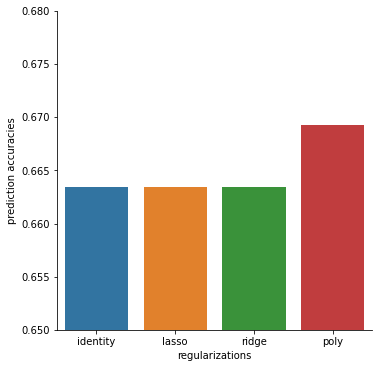

In [33]:
sns.catplot(x="regularizations", y="prediction accuracies", data=log_scores, kind="bar").set(ylim=(0.65, 0.68))

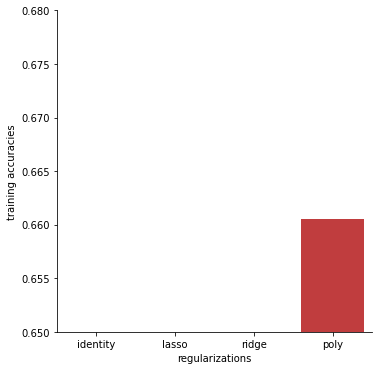

In [34]:
sns.catplot(x="regularizations", y="training accuracies", data=log_scores, kind="bar").set(ylim=(0.65, 0.68))

### Logistic Regression Results and Analysis

We used logistic regression with three different types of regularization techniques (none, L1, and L2). Since all produced the same we chose no regularization with polynomial transformation of the features.

Logistic regression underfit the dataset in all of the trials. We know this because the prediction accuracies are consistently higher than the training accuracacies. As a result of the underfitting, the addition of regularization techniques did not have a significant improvement on the prediction accuracies. The model has a high bias since it is  paying less attention to the training data and in turn oversimplifies the model. 


The logistic regression model with polynomial transform of features yielded the best prediction and training accuracies since it provided increase complexity to the model. It had a train accuracy of %66.05504587155964  and a test accuracy of %66.9260700389105.

In [ ]:
scaler = RobustScaler()
X = scaler.fit_transform(X)

# create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=10)

## SVM

In [381]:
kernels = ["linear", "rbf", "poly"]
svm_pred = [None]*len(kernels)
svm_train = [None]*len(kernels)
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
svm_table = []

### SVM with linear kernel

In [382]:
svm_linear = SVC(kernel="linear", C=100, random_state=1, class_weight="balanced")

svm_linear.fit(X_train, y_train)

svm_linear_yhat = svm_linear.predict(X_test)

svm_train[0] = svm_linear.score(X_train, y_train)
svm_pred[0] = svm_linear.score(X_test, y_test)

print("train accuracy", svm_linear.score(X_train, y_train))
print("test accuracy", svm_linear.score(X_test, y_test))
print(confusion_matrix(y_test, svm_linear_yhat))
print(classification_report(y_test, svm_linear_yhat))

train accuracy 0.6346955796497081
test accuracy 0.6498054474708171
[[256 150]
 [ 30  78]]


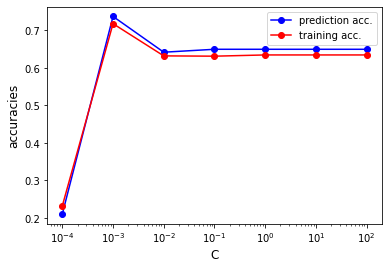

In [383]:
# changing values of C for linear kernel and adding to table
pred = []
train = []
for i in C:
    svm_rbf = SVC(kernel="linear", C=i, random_state=1, class_weight="balanced")
    svm_rbf.fit(X_train, y_train)
    pred.append(round(svm_rbf.score(X_test, y_test), 4))
    train.append(round(svm_rbf.score(X_train, y_train), 4))
svm_table.append(pred)
svm_table.append(train)
plt.plot(C, pred, color="blue", marker='o', label="prediction acc.")
plt.plot(C, train, color="red", marker='o', label="training acc.")
plt.xlabel("C", fontsize=12)
plt.ylabel("accuracies", fontsize=12)
plt.xscale("log")
plt.legend()
plt.show()

### SVM with RBF Kernel

In [384]:
svm_rbf = SVC(kernel="rbf", C=10, random_state=1, class_weight="balanced")

svm_rbf.fit(X_train, y_train)

svm_rbf_yhat = svm_rbf.predict(X_test)

svm_train[1] = svm_rbf.score(X_train, y_train)
svm_pred[1] = svm_rbf.score(X_test, y_test)

print("train accuracy", svm_rbf.score(X_train, y_train))
print("test accuracy", svm_rbf.score(X_test, y_test))
print(confusion_matrix(y_test, svm_rbf_yhat))
print("cross-val. accuracy", cross_val_score(svm_rbf, X, y, cv=5).mean())

print(classification_report(y_test, svm_rbf_yhat))

train accuracy 0.664720600500417
test accuracy 0.6595330739299611
[[264 142]
 [ 33  75]]
cross-val. accuracy 0.6567421956251172


#### RBF Kernel with Different Values for Regularization Parameter 'C'

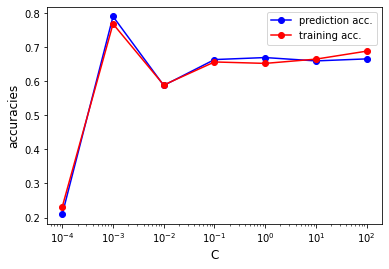

In [385]:
# changing values of C for rbf kernel and adding to table
svm_rbf_pred = []
svm_rbf_train = []
for i in C:
    svm_rbf = SVC(kernel="rbf", C=i, random_state=1, class_weight="balanced")
    svm_rbf.fit(X_train, y_train)
    svm_rbf_pred.append(round(svm_rbf.score(X_test, y_test), 4))
    svm_rbf_train.append(round(svm_rbf.score(X_train, y_train), 4))
svm_table.append(svm_rbf_pred)
svm_table.append(svm_rbf_train)
plt.plot(C, svm_rbf_pred, color="blue", marker='o', label="prediction acc.")
plt.plot(C, svm_rbf_train, color="red", marker='o', label="training acc.")
plt.xlabel("C", fontsize=12)
plt.ylabel("accuracies", fontsize=12)
plt.xscale("log")
plt.legend()
plt.show()

### SVM with polynomial kernel

In [386]:
svm_poly = SVC(kernel="poly", C=1, random_state=1, degree=3, class_weight="balanced")

svm_poly.fit(X_train, y_train)

svm_poly_yhat = svm_poly.predict(X_test)

svm_train[2] = svm_poly.score(X_train, y_train)
svm_pred[2] = svm_poly.score(X_test, y_test)

print("train accuracy", svm_poly.score(X_train, y_train))
print("test accuracy", svm_poly.score(X_test, y_test))
print(confusion_matrix(y_test, svm_poly_yhat))

print(classification_report(y_test, svm_poly_yhat))

train accuracy 0.677231025854879
test accuracy 0.6770428015564203
[[278 128]
 [ 38  70]]


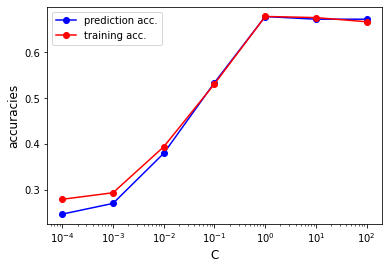

In [387]:
# changing values of C for polynomial kernel and adding to table
pred = []
train = []
for i in C:
    svm_poly = SVC(kernel="poly", C=i, random_state=1, class_weight="balanced")
    svm_poly.fit(X_train, y_train)
    pred.append(round(svm_poly.score(X_test, y_test), 4))
    train.append(round(svm_poly.score(X_train, y_train), 4))
svm_table.append(pred)
svm_table.append(train)
plt.plot(C, pred, color="blue", marker='o', label="prediction acc.")
plt.plot(C, train, color="red", marker='o', label="training acc.")
plt.xlabel("C", fontsize=12)
plt.ylabel("accuracies", fontsize=12)
plt.xscale("log")
plt.legend()
plt.show()

### Graphing Prediction Accuracies for SVM Kernels

In [388]:
svm_scores = pd.DataFrame({"kernels": kernels, "prediction accuracies": svm_pred,
                          "training accuracies": svm_train})

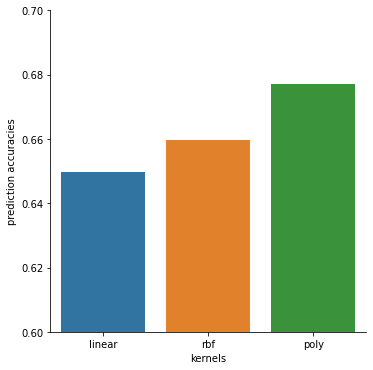

In [389]:
sns.catplot(x="kernels", y="prediction accuracies", data=svm_scores, kind="bar").set(ylim=(0.6, 0.7))

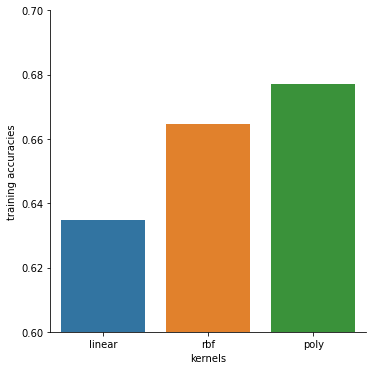

In [390]:
sns.catplot(x="kernels", y="training accuracies", data=svm_scores, kind="bar").set(ylim=(0.6, 0.7))

### SVM Results and Analysis

In the case of SVMs, we had an overall increase in results for both training and prediction accuracies. This is because SVMs can create an overall more complex model than a logistic regression model.

The SVM with the linear kernel had a slight underfit since the training accuracy was lower than the prediction accuracy, this was expected because it is the lowest complexity SVM kernel. The accuracies for this kernel did not change significantly for different values of C.

The SVM with the RBF kernel had the most changes when changing the regularization parameter 'C'. The highest training and prediction accuracies were when C = 0.001, however, it was not usable because the prediction was skewed and only predicted the class = 0; so any incorrect predictions were simply incorrectly classified 0s.
The next highest training and prediction accuracies were when C = 10, which had a more fair distribution of results, but with slight overfitting. This model has higher variance as it gives more attention to the training data and does not generalize on new data as well. Because of the overfiting, we also ran cross-validation to get a value similar to the prediction accuracy.

Laslty, the SVM with the polynomial kernel gave the best predictiction accuracy. It was the most appropriately fit model since both prediction and training accuracies were very close, with a train accuracy %67.7231025854879 and a test accuracy of %67.70428015564203.
We found that increaseing the surrounding values of C and the polynomial degree gave much lower prediction and training accuracies. 

## Neural Networks

In [401]:
activations = ["sigmoid", "tanh", "relu"]
nn_pred = [None]*len(activations)
nn_train = [None]*len(activations)
hls = [i*100 for i in range(1, 11)]
nn_table = []

### Neural Network with Sigmoid Activation

In [21]:
clf = MLPClassifier(activation="logistic", hidden_layer_sizes=(5,3), random_state=42, alpha=0)

clf.fit(X_train_poly, y_train)

y_hat_clf = clf.predict(X_test_poly)

nn_train[0] = clf.score(X_train_poly, y_train)
nn_pred[0] = clf.score(X_test_poly, y_test)

print("train accuracy", clf.score(X_train_poly, y_train))
print("test accuracy", clf.score(X_test_poly, y_test))
print(confusion_matrix(y_test, y_hat_clf))

NameError: name 'X_train_poly' is not defined

/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


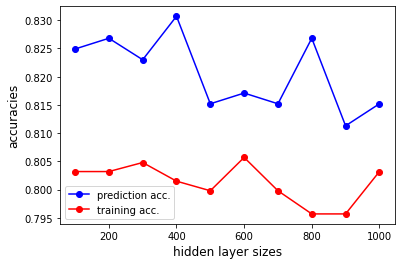

In [403]:
# changing the hidden layers
pred = []
train = []
for i in hls:
    clf = MLPClassifier(activation="logistic", hidden_layer_sizes=(i,), random_state=42, alpha=0)
    clf.fit(X_train_poly, y_train)
    pred.append(round(clf.score(X_test_poly, y_test), 4))
    train.append(round(clf.score(X_train_poly, y_train), 4))
nn_table.append(pred)
nn_table.append(train)
plt.plot(hls, pred, color="blue", marker='o', label="prediction acc.")
plt.plot(hls, train, color="red", marker='o', label="training acc.")
plt.xlabel("hidden layer sizes", fontsize=12)
plt.ylabel("accuracies", fontsize=12)
plt.legend()
plt.show()

### Neural Network with Tanh Activation

In [404]:
clf = MLPClassifier(activation="tanh", max_iter=800, hidden_layer_sizes=(750,), random_state=42, alpha=0)

clf.fit(X_train_poly, y_train)

y_hat_clf = clf.predict(X_test_poly)

nn_train[1] = clf.score(X_train_poly, y_train)
nn_pred[1] = clf.score(X_test_poly, y_test)

print("train accuracy", clf.score(X_train_poly, y_train))
print("test accuracy", clf.score(X_test_poly, y_test))
print(confusion_matrix(y_test, y_hat_clf))

train accuracy 0.8181818181818182
test accuracy 0.8171206225680934
[[388  18]
 [ 76  32]]


/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

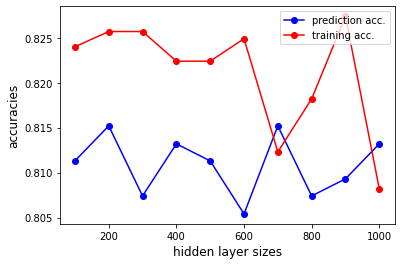

In [405]:
# changing the hidden layer sizes
pred = []
train = []
for i in hls:
    clf = MLPClassifier(activation="tanh", hidden_layer_sizes=(i,), random_state=42, alpha=0)
    clf.fit(X_train_poly, y_train)
    pred.append(round(clf.score(X_test_poly, y_test), 4))
    train.append(round(clf.score(X_train_poly, y_train), 4))
nn_table.append(pred)
nn_table.append(train)
plt.plot(hls, pred, color="blue", marker='o', label="prediction acc.")
plt.plot(hls, train, color="red", marker='o', label="training acc.")
plt.xlabel("hidden layer sizes", fontsize=12)
plt.ylabel("accuracies", fontsize=12)
plt.legend()
plt.show()

### Neural Network with Relu Activation

In [406]:
clf = MLPClassifier(activation="relu", max_iter=800, hidden_layer_sizes=(90,), random_state=42, alpha=0)

clf.fit(X_train_poly, y_train)

y_hat_clf = clf.predict(X_test_poly)

nn_train[2] = clf.score(X_train_poly, y_train)
nn_pred[2] = clf.score(X_test_poly, y_test)

print("train accuracy", clf.score(X_train_poly, y_train))
print("test accuracy", clf.score(X_test_poly, y_test))
print(confusion_matrix(y_test, y_hat_clf))

train accuracy 0.8248540450375312
test accuracy 0.8210116731517509
[[388  18]
 [ 74  34]]


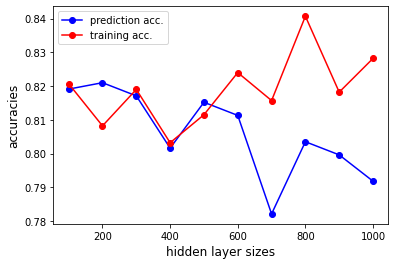

In [407]:
# changing the hidden layer sizes 
pred = []
train = []
for i in hls:
    clf = MLPClassifier(activation="relu", hidden_layer_sizes=(i,), random_state=42, alpha=0)
    clf.fit(X_train_poly, y_train)
    pred.append(round(clf.score(X_test_poly, y_test), 4))
    train.append(round(clf.score(X_train_poly, y_train), 4))
nn_table.append(pred)
nn_table.append(train)
plt.plot(hls, pred, color="blue", marker='o', label="prediction acc.")
plt.plot(hls, train, color="red", marker='o', label="training acc.")
plt.xlabel("hidden layer sizes", fontsize=12)
plt.ylabel("accuracies", fontsize=12)
plt.legend()
plt.show()

### Graphing Prediction Accuracies for Neural Network Activations

In [408]:
nn_scores = pd.DataFrame({"activations": activations, "prediction accuracies": nn_pred,
                         "training accuracies": nn_train})

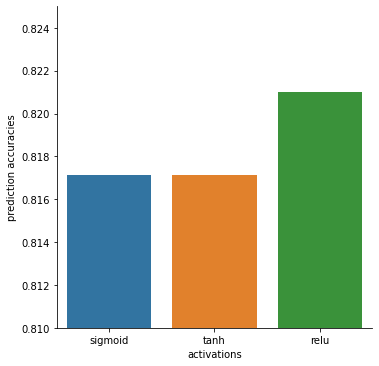

In [409]:
sns.catplot(x="activations", y="prediction accuracies", data=nn_scores, kind="bar").set(ylim=(0.81, 0.825))

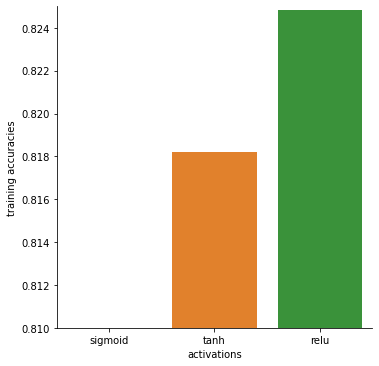

In [410]:
sns.catplot(x="activations", y="training accuracies", data=nn_scores, kind="bar").set(ylim=(0.81, 0.825))

### Neural Networks Results and Analysis

We used three different activation functions for our neural networks. The first was the sigmoid function. For each of the models we used a polynomial transformation of features on the dataset since the prediction and training accuracies were higher using the transformation.

In the sigmoid function neural network there was slight underfitting of the model to the transformed features. Becuase of this we minimized the regularization parameter by setting alpha = 0. We also found that the value of hidden_layer_sizes did not have a significant effect on the prediction and training accuracies.

The second model used the tanh activation, again, to avoid underfitting we set the regularization parameter alpha = 0, and did hyperparameter tuning on the hidden_layer_sizes. After doing this we had a very appropriate-fitting model since the prediction and training accuracies were very close to each other, with a train accuracy of %81.7347789824854 and 
test accuracy of %81.71206225680934. 

Using the relu activation, we were able to get the highest prediction and training accuracies, while also having an appropriate-fitting model. The train accuracy was %82.48540450375312 and the test accuracy was %82.10116731517509. We did this by setting alpha = 0, and again conducting hyperparameter tuning on the hidden_layer_sizes.

For each of the models we tuned the hidden_layer_sizes by running the model on various consecutive sizes using for-loops. The relu model had large variations in accuracies, even among values that were right next to each other for the hidden_layer_size.


## Conclusion

### Tables

These are tables for each of the different learning algorithms when tuning for specific parameters.

In Logistic regression we tuned the maximum iterations for the descent algorithm, for SVMs we turned the value of the regularization parameter C, and in Neural Networks we tuned the hidden layer sizes to get the best prediction accuracy with the msot appropriate fit

### Logistic Regression

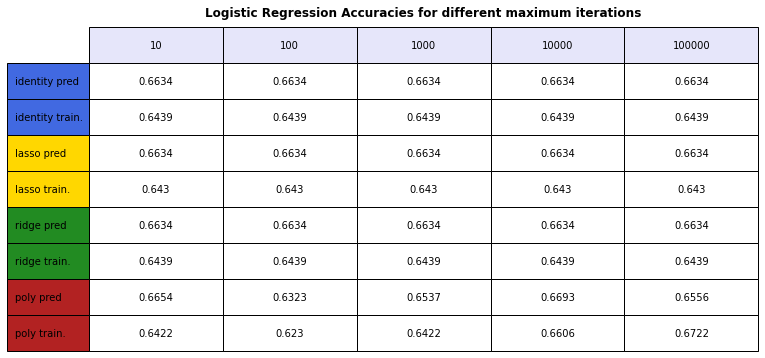

In [411]:
# changing the values for max_iters
r = []
c = ["royalblue", "gold", "forestgreen", "firebrick"]
for i in range(len(log_table)):
    if i%2 == 0:
        r.append("{} pred".format(regs[i//2]))
    else:
        r.append("{} train.".format(regs[i//2]))

fig, ax = plt.subplots()
ax.set_axis_off()
table = ax.table(
        cellText=log_table,
        rowLabels = r,
        colLabels = max_iters,
        rowColours = [c[i//2] for i in range(len(r))],
        colColours = ["lavender"]*len(max_iters),
        cellLoc = "center",
        loc = "upper center")
ax.set_title("Logistic Regression Accuracies for different maximum iterations", 
             fontweight="bold", loc="center")
table.scale(2,3)
plt.show()

### SVM

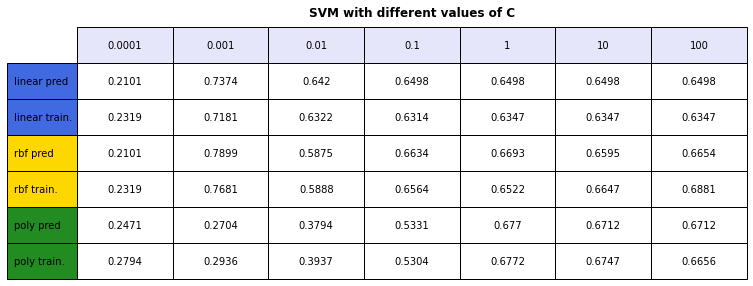

In [412]:
# changing the values of C in each SVM
r = []
c = ["royalblue", "gold", "forestgreen", "firebrick"]
for i in range(len(svm_table)):
    if i%2 == 0:
        r.append("{} pred".format(kernels[i//2]))
    else:
        r.append("{} train.".format(kernels[i//2]))

fig, ax = plt.subplots()
ax.set_axis_off()
table = ax.table(
        cellText = svm_table,
        rowLabels = r,
        colLabels = C,
        rowColours = [c[i//2] for i in range(len(r))],
        colColours = ["lavender"]*len(C),
        cellLoc = "center",
        loc = "upper center")
ax.set_title("SVM with different values of C", 
             fontweight="bold", loc="center")
table.scale(2,3)
plt.show()

### Neural Networks

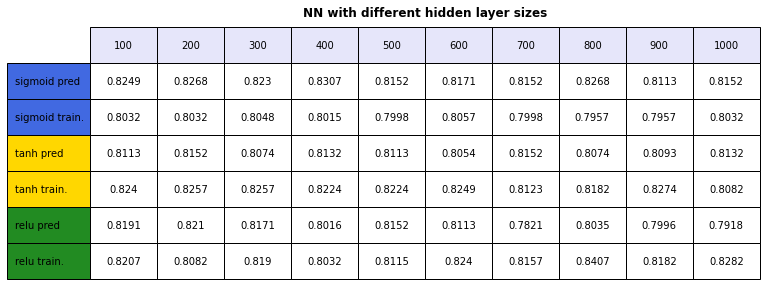

In [413]:
# changing the values of hidden layer sizes
r = []
c = ["royalblue", "gold", "forestgreen", "firebrick"]
for i in range(len(nn_table)):
    if i%2 == 0:
        r.append("{} pred".format(activations[i//2]))
    else:
        r.append("{} train.".format(activations[i//2]))

fig, ax = plt.subplots()
ax.set_axis_off()
table = ax.table(
        cellText = nn_table,
        rowLabels = r,
        colLabels = hls,
        rowColours = [c[i//2] for i in range(len(r))],
        colColours = ["lavender"]*len(hls),
        cellLoc = "center",
        loc = "upper center")
ax.set_title("NN with different hidden layer sizes", 
             fontweight="bold", loc="center")
table.scale(2,3)
plt.show()

(0.6, 0.85)

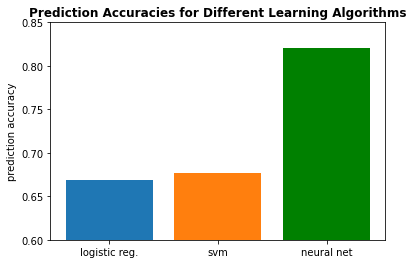

In [414]:
scores = []
scores.append(max(log_pred))
scores.append(max(svm_pred))
scores.append(max(nn_pred))

l  = ["logistic reg.", "svm", "neural net"]

plt.bar(l, scores,
       color=["tab:blue", "tab:orange", "green"])
plt.title("Prediction Accuracies for Different Learning Algorithms", fontweight="bold")
plt.ylabel("prediction accuracy")
plt.ylim(0.6, 0.85)

(0.6, 0.85)

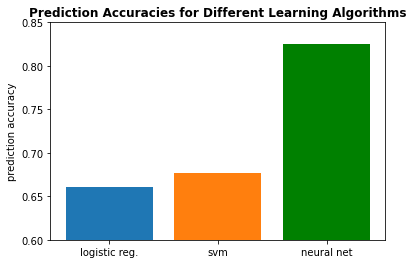

In [415]:
scores = []
scores.append(max(log_train))
scores.append(max(svm_train))
scores.append(max(nn_train))

l  = ["logistic reg.", "svm", "neural net"]

plt.bar(l, scores,
       color=["tab:blue", "tab:orange", "green"])
plt.title("Prediction Accuracies for Different Learning Algorithms", fontweight="bold")
plt.ylabel("prediction accuracy")
plt.ylim(0.6, 0.85)


Due to the complexity of the dataset, most of the models that we created were underfit. The neural networks had a much higher average training and prediction accuracy than the other model types, while also keeping a fair precision of each class. 

Neural networks (%82.10 prediction accuracy) out performed both SVMs (%67.70 prediction accuracy) and Logistic Regression (%66.92 prediction accuracy) by approximatley %15. The neural network models had both low variance and low bias and yeilded the most appropriate-fitting models to the dataset. Nueral networks were able to correctly classify 318 instances  out of 406 in the class "no fire", yeilding a true positive rate (TPR) of 0.78. While SVMs predicted  278 "no fire" instances out of 406 accuratley and logistic regression predicted 270 out of 406 instances correctly. The TPRs for SVMs and logistic regression are 0.68 and 0.66 respectively. The results are expected, because as the complexity of the model increases from logistic regression to nerual netwroks, the more accuratley the model is able to predict.  



### Works Cited 

Adams, R. Dallon. “Fighting Fire with AI: Using Deep-Learning to Help Predict Wildfires in the US.” TechRepublic, TechRepublic, 1 June 2020, www.techrepublic.com/article/fighting-fire-with-ai-using-deep-learning-to-help-predict-wildfires-in-the-us/

Editorial Staff | January 2, 2016 Topics: Healthy Air Healthy Air. “How Wildfires Affect Our Health.” American Lung Association, American Lung Association, 2 Apr. 2020, www.lung.org/blog/how-wildfires-affect-health. 

Dataset:

Oulad Sayad, Younes; Mousannif, Hajar; Al Moatassime, Hassan (2019), “Data for: Predictive Modeling of Forest Fires: A New Dataset and Machine Learning Approach”, Mendeley Data, V1, doi: 10.17632/85t28npyv7.1